# CSTR cubic roots example (Taken from example [])

## Python imports

In [1]:
import scipy as sp
from scipy.integrate import odeint
import scipy.linalg
import scipy.optimize

import matplotlib.pyplot as plt

from ipywidgets import interact

%matplotlib inline
plt.style.use("ggplot")

## Define kinetics

We use the following autocatalytic reaction:

$$ 
\begin{align}
\mathrm{A + 2B} &\rightarrow \mathrm{3B} \\
\mathrm{B} &\rightarrow \mathrm{C}
\end{align}
$$

to demonstrate the geometric relationship between the rate field and fundamental reactor types. Rate expressions are given by:

$$
\begin{align}
\mathrm{r_{A}} & = \mathrm{-k_{1}c_{A}c_{B}^{2}} \\
\mathrm{r_{B}} & = \mathrm{k_{1}c_{A}c_{B}^{2}-k_{2}c_{B}} \\
\mathrm{r_{C}} & = \mathrm{k_{1}c_{B}}
\end{align}
$$

## CSTR equations
The CSTR equations specific for components A and B are:

$$
\begin{align}
\mathrm{c_{A}} & = \mathrm{c_{Af}} + \tau \mathrm{r_A}\left( \mathbf{C} \right) \\
\mathrm{c_{B}} & = \mathrm{c_{Bf}} + \tau \mathrm{r_B}\left( \mathbf{C} \right)
\end{align}
$$

Solving for $\mathrm{c_A}$ and $\mathrm{c_B}$ in the CSTR expression results in 

$$
\mathrm{c_{A}=\frac{c_{Af}}{1+\tau k_{1}c_{B}^{2}}} \\
\mathrm{c_{B}=c_{Bf}+\tau k_{1}\left(\frac{c_{Af}}{1+\tau k_{1}c_{B}^{2}}\right)c_{B}^{2}-\tau k_{2}c_{B}}
$$

the condition for a CSTR solution is then

$$ 
\mathrm{f(c_{B})=c_{B}^{3}τk_{1}(1+τk_{2})-c_{B}^{2}τk_{1}(c_{Af}+c_{Bf})+c_{B}(1+\tau k_{2})-c_{Bf}=0}
$$

## Plotting function

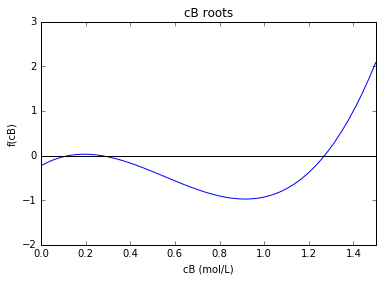

In [2]:
def plot_fn(CfA=5.0, CfB=0.25, tau=3.0):
    Cf = sp.array([CfA, CfB])
    
    def f(cB):
        k1 = 1.0
        k2 = 1.0
        
        term1 = cB**3*tau*k1*(1 + tau*k2)
        term2 = -cB**2*tau*k1*(CfA + CfB)
        term3 = cB*(1 + tau*k2)
        term4 = -CfB
        
        f = term1 + term2 + term3 + term4
        return f
    
    cb_range = sp.linspace(0.0,1.5,50)
    
    #generate fs
    fs = sp.zeros(cb_range.shape[0])
    for i,cb_i in enumerate(cb_range):
        fs[i] = f(cb_i)
    
    #generate figure
    fig = plt.figure()
    ax = fig.gca()
    plt.hold(True)
    
    #plot PFR
    plt.plot(cb_range, fs, "b-")
    
    #zero line
    plt.plot([0, 1.5],[0,0], "k-")
    
    plt.title('cB roots')
    plt.xlabel('cB (mol/L)')
    plt.ylabel('f(cB)')
    plt.axis([0,1.5, -2.0,3.0])
    
    plt.show()
    
interact(plot_fn, CfA=(0,10,0.01), CfB=(0,1,0.01), tau=(0.001, 5.0, 0.01))

Solving for the corresponding concentration for component A

In [3]:
def cA_fn(cB):
    k1 = 1.0
    k2 = 1.0
    
    tau = 3.0
    CfA = 5.0
    
    return CfA/(1.0 + tau*k1*cB**2)
    
cA_fn(1.0)

1.25